# Classifiers comparison on texts with naive Bayes assumption

### Consegna

In questo notebook andiamo a confrontare due modeli per la classificazione di dati categorici:

1. Multivariate Bernoulli - Non tiene conto della frequenza delle parole all'interno della frase, ma tiene conto della presenza o meno di una parola all'interno della frase


2. Multinomial on a dataset - Tiene conto della frequenza delle parole all'interno della frase

### Dataset

Il dataset è costituito da tweet estrapolati da Twitter, etichettati con `Joy` o con `Sadness` in base al sentimento legato alla frase

#### Estraiamo i dati e vediamo come sono organizzati

I dati sono organizzati in una matrice sparsa, in modo da salvare ottimizzare lo spazio occupato e il tempo richiesto per esaminarla.

E' costituito da 3 *array paralleli* così organizzati:

- data[i] = Contiene il valore della cella i-esima, i cui indici sono contenuti in row[i] e col[i]
  
- row[i] = Contiene l'indice della riga della cella i-esima
- col[i] = Contiene l'indice della colonna della cella i-esima

Il dataset è in formato csv, ed è già stato pre-processato per la rimozione delle stopword e per la sostituzione degli **elementi interessanti** del documento con un'identificatore numerico.

Gli elementi interessanti posso essere parole, emoji o emoticons. Vengono sostituiti con un `element_id` così che ogni volta che viene riutilizzato nel file si sostituisce con l'element_id associato. Quest'ultimo viene utilizzato come indice per la colonna della matrice sparsa, con lo scopo di salvare i dati.

Ogni riga nella matrice corrisponde ad il contenuto di un tweet, ed è composta da una lista di coppie di numero `(element_id, frequency)`, seguiti da una stringa `(Joy o Sadness)`

Il dataset è composto da 11981 tweet (rows)

### Loading Dataset

##### Carichiamo i dati all'interno della matrice sparsa

Usiamo scipy.sparse per organizzare la matrice sparsa. Per matrice sparsa intendiamo una matrice che ha, per ogni riga, tante colonne quante sono le parole/emoji/emoticons presenti nel documento. Le colonne (parole) che non sono presenti nella riga (frase) sono riempite con 0.

In [41]:
from time import sleep
from numpy import ndarray, zeros
import numpy as np
import scipy
from scipy.sparse import csr_matrix

In [42]:
class_labels = ["Joy", "Sadness"]
n_features = 11288 # number of columns in the matrix = number of features (distinct elements in the documents)
n_rows = 11981 # number rows of the matrix
n_elements = 71474 # number of the existing values in the matrix (not empty, to be loaded in the matrix in a sparse way)

#path_training="/Users/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
path_training="/Users/paolobonicco/Projects/ml-uniTo-21-22/Meo/4_probabilistic_model/data/"
file_name="joy_sadness6000.txt"

Dichiariamo gli array per le righe e le colonne. Le iniziamo a 0, e la lunghezza la fissiamo al numero di possibili elementi all'interno del dataset

In [43]:
# declare the row and col arrays with the indexes of the matrix cells (non empty) to be loaded from file
# they are needed because the matrix is sparse and we load in the matrix only the elements which are present
row = np.empty(n_elements, dtype=int)
col = np.empty(n_elements, dtype=int)
data = np.empty(n_elements, dtype=int)

row_n = 0 # number of current row to be read and managed
cur_el = 0 # position in the three arrays: row, col and data
twitter_labels = [] # list of class labels (target array - emotions) of the documents (tweet) that will be read from the input file
twitter_target=[] # list of 0/1 for class labels

Leggiamo il file e riepiamo la matrice sparsa. Il file è composto da tante righe, ogni riga contiene un tweet e la label associata a quel tweet. Il tweet è rappresentato da una lista di numeri, i numeri sono da leggere come coppie. Il primo numero rappresenta l'element_id, il secondo numero rappresenta la frequenza con cui l'elemento è presente nel tweet.

Vediamo un esempio:

In [44]:
with open(path_training + file_name, "r") as fi:
    elements = []
    for line in fi:
        elements.append(line)
        
print(elements[len(elements)-1])

2,1,105,2,1174,1,1322,1,7762,1,Sadness



In [45]:
with open(path_training + file_name, "r") as fi:
    for line in fi:
        el_list = line.split(',')  # list of integers read from a row of the file
        l = len(el_list) # number of words in the tweet
        
        last_el = el_list[l-1] # Last item -> Label
        class_name = last_el.strip() # eliminate the '\n'
        twitter_labels.append(class_name)
        
        # twitter_labels contains the labels (Joy/Sadness); twitter_target contains 0/1 for the respective labels
        if (class_name == class_labels[0]):
           twitter_target.append(0) # JOY
        else:
           twitter_target.append(1) # SADNESS
           
        i = 0 # I start reading all the doc elements from the beginning of the list
        
        #? In this while we iterate each element of the row (words in the tweet)
        while(i < (l-1)):
            element_id = int(el_list[i]) # identifier of the element in the document equivalent to the column index
            element_id = element_id - 1 # the index starts from 0 (the read id starts from 1)
            i = i + 1
            value_cell = int(el_list[i]) # make access to the following value in the file which is the count of the element in the document
            i = i + 1
            
            #! Da capire fino in fondo
            
            row[cur_el] = row_n # load the data in the three arrays: the first two are the row and col indexes; the last one is the matrix cell value
            col[cur_el] = element_id
            data[cur_el] = value_cell
            cur_el = cur_el + 1
        row_n = row_n + 1
fi.close

<function TextIOWrapper.close()>

E stampiamo la matrice sparsa ottenuta

In [46]:
print("final n_row = " + str(row))

# loads the matrix by means of the indexes and the values in the three arrays just filled
twitter_data = csr_matrix((data, (row, col)), shape=(n_rows, n_features)).toarray()

print("resulting matrix: " + str(twitter_data[0]))

print(twitter_data[0:10])

# print(twitter_data[0:10])
# print(twitter_labels[0:5],twitter_labels[-5:])
# print(twitter_target[0:5],twitter_target[-5:])
# print(row[0:10])
# print(twitter_data[0])

final n_row = [         0          0          0 ... 4435709600 4435709472 4435709280]


ValueError: row index exceeds matrix dimensions

##### Stampiamo alcuni tweet

In [ ]:
for i in range(10):
    print(i, ": ", elements[i])


0 :  1,1,2,1,3,1,4,1,Joy

1 :  5,1,6,1,7,1,8,1,9,1,10,1,11,1,12,1,Joy

2 :  13,1,14,1,15,1,16,1,17,1,18,1,19,1,20,1,21,1,22,1,Joy

3 :  20,1,23,1,24,1,25,1,26,1,27,1,28,1,29,1,30,1,31,1,32,1,33,1,Joy

4 :  23,1,34,1,35,1,36,1,37,2,Joy

5 :  31,1,38,5,39,1,40,1,41,1,42,1,43,1,44,1,45,1,Joy

6 :  23,1,46,1,47,1,Joy

7 :  23,1,48,1,49,1,Joy

8 :  50,1,51,1,52,1,53,1,54,1,55,1,56,1,Joy

9 :  23,1,57,1,58,2,59,1,60,1,61,1,62,1,Joy



##### Stampiamo alcuni dati sui tweet

twitter_data --> Matrice sparsa

enumerate -> Associa un numero ad ogni elemento di una matrice ( [x, y, z] -> [(0, x), (1, y), (2, z)] )

In [ ]:
def twitter_info(studied_twitter, twitter_data = twitter_data):
    print("numero di tweet: ", len(twitter_data))
    print("numero di feature o parole del dizionario:", len(twitter_data[studied_twitter]), "\n")

    print(twitter_data[studied_twitter])
    print("numero parole nel twitter {}: {}\n".format(studied_twitter, np.sum(twitter_data[studied_twitter])))
    
    x = [(i,x) for i,x in enumerate(twitter_data[studied_twitter]) if x >= 1]
    print("Riga della matrice sparsa del tweet 19", x)
    
    x = [i for i,x in enumerate(twitter_data[studied_twitter]) if x >= 1]
    print("Id delle parole che contiene il twitter {}: {}".format(studied_twitter, x))

In [ ]:
studied_twitter = 19

print("tweet n° 19: ", elements[studied_twitter])

twitter_info(studied_twitter)

tweet n° 19:  38,5,101,1,102,1,103,1,104,1,Joy

numero di tweet:  11981
numero di feature o parole del dizionario: 11288 

[0 0 0 ... 0 0 0]
numero parole nel twitter 19: 9

Riga della matrice sparsa del tweet 19 [(37, 5), (100, 1), (101, 1), (102, 1), (103, 1)]
Id delle parole che contiene il twitter 19: [37, 100, 101, 102, 103]


## Classificazione - Esercizio per studenti

Splittiamo il dataset in training e testing set in maniera randomica. Dopo di che proviamo a costruire un classificatore che predica la classe (Joy/Sadness) del messaggio in base alle parole. 

Consideriamo i due modelli possibili:

1. Multivariate Bernoulli

2. Multinomial Bernoulli -> Tiene conto della frequenza delle parole all'interno della frase

Dopo di che andiamo a valutare i modelli ottenuti, andando a calcolare *l'accuracy* e verificare se le differenze osservate sono significative.

### Multivariate Bernoulli

Questo modello è un modello di classificazione binaria, che assume che ogni feature sia indipendente e che la distribuzione di ogni feature sia una Bernoulli.
Ciò vuol dire che funziona con feature binarie o booleane.

#### Split the data

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_roc_curve, RocCurveDisplay

import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(twitter_data, twitter_target, 
                                                    test_size = 0.10, random_state = 1)

#### Normalize between 0-1 (value >= 1 ? 1 : 0)

Serve normalizzare in quanto in questo caso non teniamo conto della frequenza delle parole all'interno della frase ma solo se son presenti o meno, quindi tutti i valori >= 1 vengono trasformati in 1

In [ ]:
X_train_normalize = (X_train >= 1) * 1
X_test_normalize = (X_test >= 1) * 1

#### Train the model and predict on test

- `BernoulliNB().fit()` -> Train the Bernoulli Naive Bayes classifier for multivariate Bernoulli models
- `.predict()` -> Predict class labels for samples in X

In [ ]:
bernul_model = BernoulliNB().fit(X = X_train_normalize, y = y_train)
bernul_y_pred = bernul_model.predict(X_test_normalize)

#### Accuracy

In [ ]:
print("Accuracy: ", accuracy_score(y_test, bernul_y_pred))

Accuracy:  0.9566305254378649


#### Roc Curve

/Users/paolobonicco/Projects/ml-uniTo-21-22/venvml/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


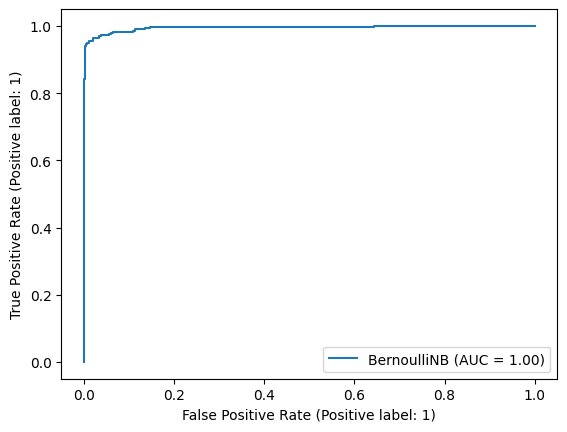

In [52]:
plot_roc_curve(bernul_model,X_test_normalize,y_test)

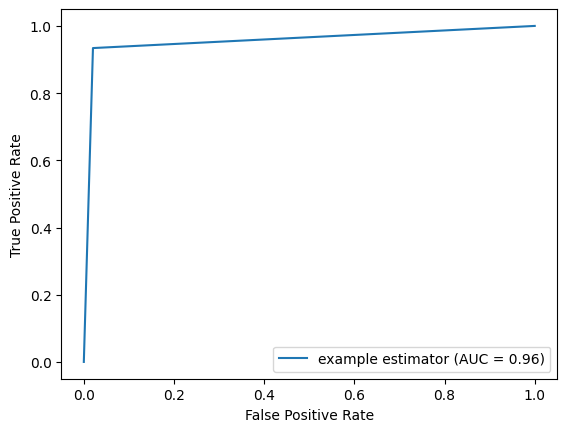

In [ ]:
# plot_roc_curve(bernul_model,X_test_normalize,y_test)
fpr, tpr, thresholds = metrics.roc_curve(bernul_y_pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                    estimator_name='example estimator')
display.plot()
plt.show()

##### Lighter method

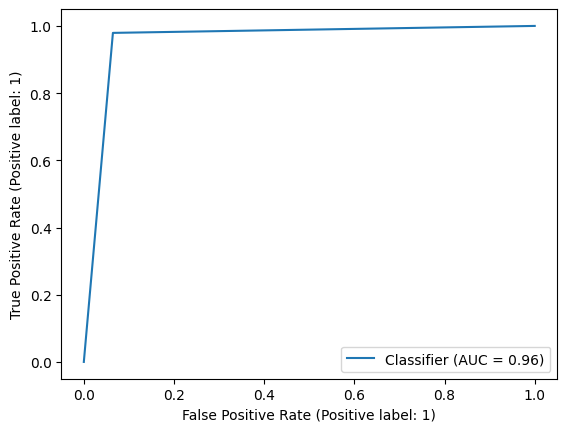

In [ ]:
RocCurveDisplay.from_predictions(y_test, bernul_y_pred)
plt.show()

#### Plot multivariate vector

X_train_normalize contiene l'array con i valori normalizzati, in cui troviamo 1 quando la parola è presente nel tweet, 0 altrimenti.

`Alhpas` contiene i la somma di tutte le parole uguali in tutti i tweet, normalizzati sul totale delle parole

Esempio di come funziona alphas

In [ ]:
a = np.array([[1,2,3,4,5],[6,7,8,9,10]])
a[:,1]

array([2, 7])

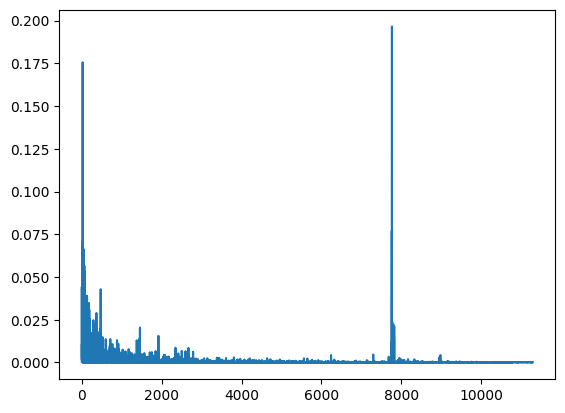

In [ ]:
alphas = np.zeros(len(X_train_normalize[0])) # features
num_document = len(X_train_normalize) # docs

for i in range(0, len(X_train_normalize[0])):    
    alphas[i] = np.sum(X_train_normalize[:,i]) / num_document
    
plt.plot(alphas)

### Multinomial Bernoulli

#### Model

In [50]:
multin_model = MultinomialNB().fit(X = X_train, y = y_train)
multin_y_pred = multin_model.predict(X_test)

#### Accuracy

In [51]:
print(accuracy_score(y_test,multin_y_pred))

0.950792326939116


#### Roc Curve

/Users/paolobonicco/Projects/ml-uniTo-21-22/venvml/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


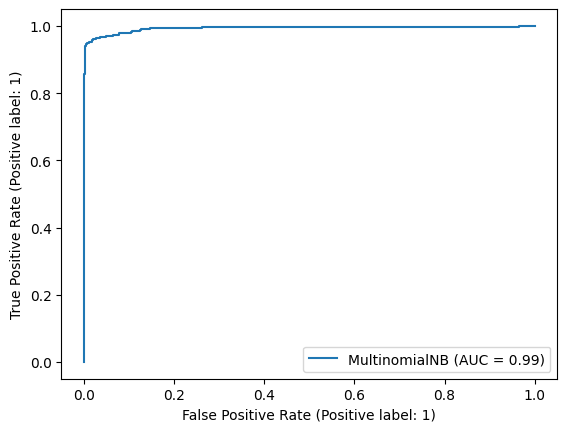

In [49]:
plot_roc_curve(multin_model,X_test,y_test)

## 2. Facolativo

Run a  statistical test on the results of the 10 folds of a 10-fold cross-validation, in order to determine if the two classification models (Multivariate Bernoulli and Multinomial Bernoulli) present differences which are statistically significant at the significance level `alpha = 0.05`.

In [53]:
from sklearn.model_selection import cross_val_score

n_fold = 10

### Bernulli mutivariate

In [54]:
score_bernulli_multivariate = cross_val_score(BernoulliNB(), twitter_data, twitter_target, cv = n_fold)
print("Bernulli multivariate: ", score_bernulli_multivariate)

Bernulli multivariate:  [0.95663053 0.96577629 0.94991653 0.94991653 0.94824708 0.9524207
 0.95075125 0.95492487 0.9624374  0.93656093]


Mean on 10 folds

In [55]:
print(score_bernulli_multivariate.mean())

0.9527582111414491


### Bernulli multinomial

In [56]:
score_bernulli_multinomial = cross_val_score(MultinomialNB(), twitter_data, twitter_target, cv = n_fold)
print("Bernulli multinomial: ", score_bernulli_multinomial)

Bernulli multinomial:  [0.95412844 0.96494157 0.94991653 0.94824708 0.94407346 0.94741235
 0.9490818  0.94991653 0.96160267 0.93739566]


Mean on 10 folds

In [58]:
print(score_bernulli_multinomial.mean())

0.9506716086443767


### Confrontiamo i risultati ottenuti

Il metodo stats.ttest_1samp di scipy è utilizzato per calcolare il test T di una campione unico, che viene utilizzato per determinare se la media di un campione è significativamente diversa da un valore noto di riferimento. Il metodo accetta due argomenti principali: il campione (una serie di dati) e il valore di riferimento. Il metodo restituisce una tupla contenente il valore del test statistico T e il valore del p-value. Il valore del p-value indica la probabilità che i risultati del campione siano stati ottenuti per caso, se il valore p è inferiore a un certo livello di significatività (ad esempio 0,05), si può concludere che la media del campione è significativamente diversa dal valore di riferimento.

In [59]:
from scipy import stats

alpha = 0.05
mu = 0 # ipotesi nulla

accuracies_diff = score_bernulli_multivariate - score_bernulli_multinomial

scipy_t, scipy_pval = stats.ttest_1samp(accuracies_diff, mu)
print(scipy_t, scipy_pval)

if(scipy_pval > alpha):
    print("accetto l'ipotesi: i due criteri sono simili")
else:
    print("non accetto l'ipotesi: i due criteri non sono simili")
    

3.2123990690558073 0.010617994606921194
non accetto l'ipotesi: i due criteri non sono simili
